In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

import warnings
warnings.filterwarnings('ignore')

In [44]:
path=r'C:\Users\user\Desktop\Analyst_Data.csv'
df=pd.read_csv(path)

<h2> Exploratory Data Analysis </h2>

In [6]:
df.head() #Displays the first few rows

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Unnamed: 4,Unnamed: 5
0,0.0,1/1/2020 0:00,0.0,1.5098490,NaN,NaN
1,1.0,1/1/2020 1:00,0.0,1.4118588,NaN,NaN
2,2.0,1/1/2020 2:00,0.0,1.0238976,NaN,NaN
3,3.0,1/1/2020 3:00,0.0,0.6420000,NaN,NaN
4,4.0,1/1/2020 4:00,0.0,0.9600000,NaN,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82734 entries, 0 to 82733
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hour                                8760 non-null   float64
 1   Date/hour start                     8760 non-null   object 
 2   Solar electricity generation (kWh)  8760 non-null   float64
 3   Electricity usage (kWh)             8760 non-null   object 
 4   Unnamed: 4                          0 non-null      float64
 5   Unnamed: 5                          0 non-null      float64
dtypes: float64(4), object(2)
memory usage: 3.8+ MB


In [50]:
# Summary Statistics
summary_stats = df[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Solar electricity generation (kWh)
count                         8760.000000
mean                             1.116750
std                              2.026098
min                              0.000000
25%                              0.000000
50%                              0.024000
75%                              1.272750
max                             13.050000


In [51]:
df['Electricity usage (kWh)'].describe()

count           8760
unique          2706
top       0.0000000 
freq             136
Name: Electricity usage (kWh), dtype: object

In [52]:
df['Solar electricity generation (kWh)'].describe()

count    8760.000000
mean        1.116750
std         2.026098
min         0.000000
25%         0.000000
50%         0.024000
75%         1.272750
max        13.050000
Name: Solar electricity generation (kWh), dtype: float64

In [46]:
df.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)', 'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')

In [47]:
to_drop=['Unnamed: 4', 'Unnamed: 5']
df=df.drop(columns=to_drop)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82734 entries, 0 to 82733
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hour                                8760 non-null   float64
 1   Date/hour start                     8760 non-null   object 
 2   Solar electricity generation (kWh)  8760 non-null   float64
 3   Electricity usage (kWh)             8760 non-null   object 
dtypes: float64(2), object(2)
memory usage: 2.5+ MB


<h5> It seems we do have missing values in our dataset </h5>

In [11]:
df.shape

(82734, 4)

<h5> We have 82734 rows and 4 columns in our dataset but 8760 non-null values </h5>

In [12]:
# Checking if we have duplicated rows that may cause the problem
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 73973


TypeError: 'value' must be an instance of str or bytes, not a float

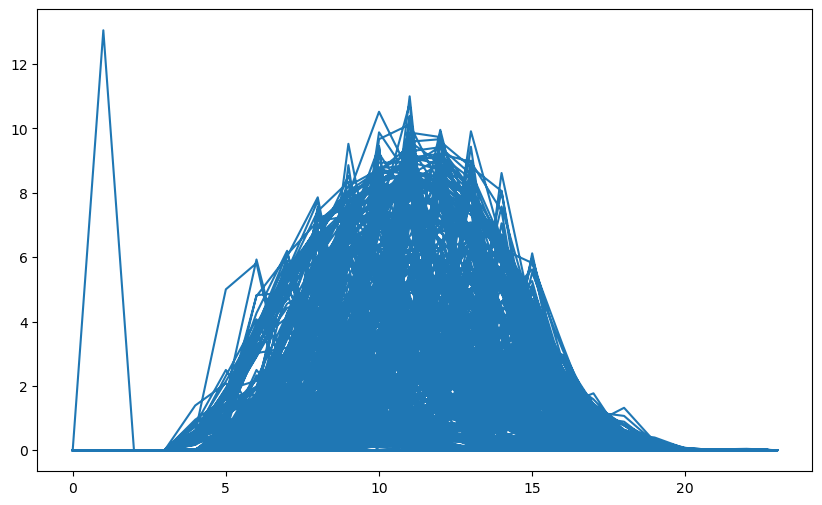

In [17]:
# Method 1: Visual Inspection to check for outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Hour'], df['Solar electricity generation (kWh)'])
plt.plot(df['Hour'], df['Electricity usage (kWh)'])
plt.title('Time Series Data')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.legend(['Solar Generation', 'Electricity Usage'])
plt.show()


array([[<Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Solar electricity generation (kWh)'}>]],
      dtype=object)

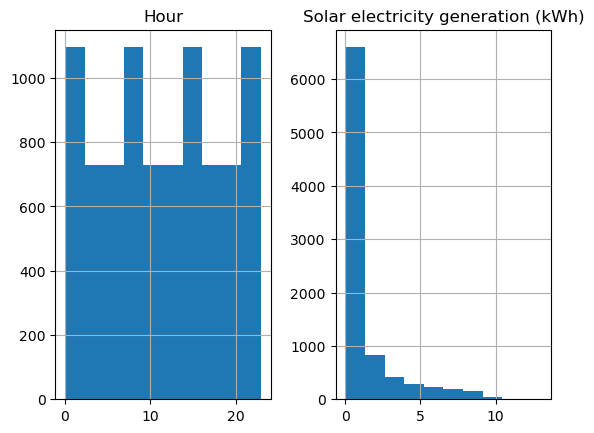

In [20]:
df.hist()

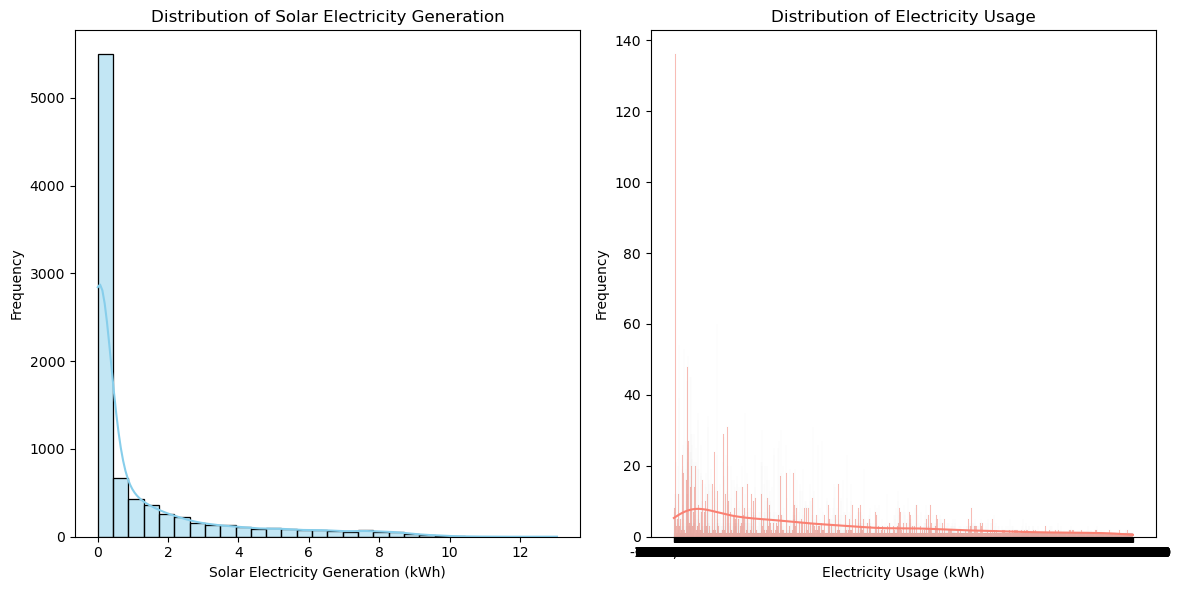

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for solar electricity generation and electricity usage
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Solar electricity generation (kWh)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Solar Electricity Generation')
plt.xlabel('Solar Electricity Generation (kWh)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Electricity usage (kWh)'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Electricity Usage')
plt.xlabel('Electricity Usage (kWh)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [53]:
# Correlation Analysis
correlation_matrix = df[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                    Solar electricity generation (kWh)
Solar electricity generation (kWh)                                 1.0


In [54]:
df.corr()

,Hour,Solar electricity generation (kWh)
Hour,1.000000,-0.029882
Solar electricity generation (kWh),-0.029882,1.000000


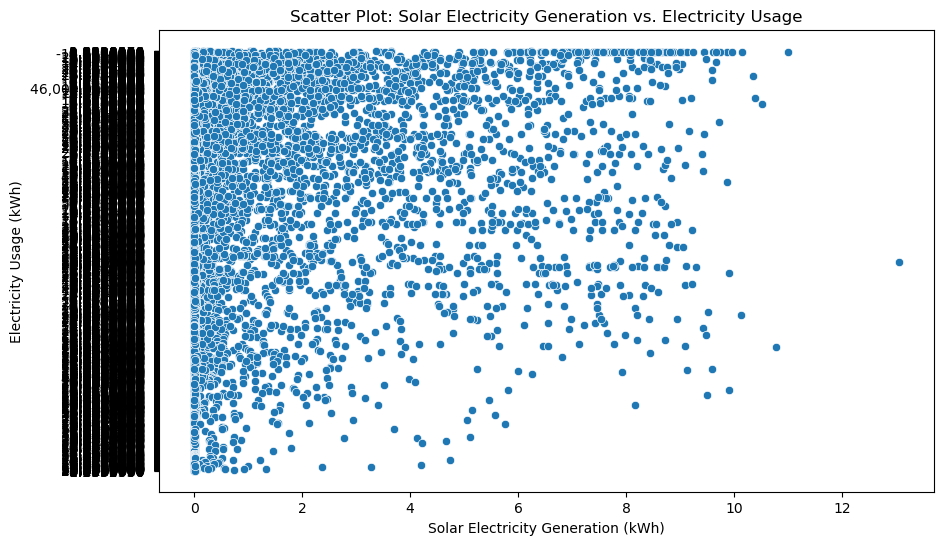

In [59]:
# Scatter Plot for Outlier Detection and Visualization
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Solar electricity generation (kWh)', y='Electricity usage (kWh)', data=df)

# Add title and labels
plt.title('Scatter Plot: Solar Electricity Generation vs. Electricity Usage')
plt.xlabel('Solar Electricity Generation (kWh)')
plt.ylabel('Electricity Usage (kWh)')

# Show plot
plt.show()

<h2> Predicting Solar Electricity Generation </h2>

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
df['Hour'] = pd.to_datetime(df['Date/hour start']).dt.hour

In [26]:
# Split the Data into Training and Testing Sets
X = df[['Hour']]  # Features
y = df['Solar electricity generation (kWh)']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Handle Missing Values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Impute missing values with mean

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [35]:
#Handle Missing Values in both X and y
df.dropna(subset=['Solar electricity generation (kWh)'], inplace=True)

In [38]:
# Choose a Regression Model and Train the Model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Evaluate the Model
y_pred = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.9873810488263373


<h5> An RMSE OF 1.987 indicates that the model is making really good predictions </h5>

In [39]:
# Predict Solar Electricity Generation
# Example: Predict solar electricity generation for a given hour
hour_to_predict = 12
predicted_generation = model.predict([[hour_to_predict]])
print("Predicted solar electricity generation for hour", hour_to_predict, ":", predicted_generation[0])


Predicted solar electricity generation for hour 12 : 1.1216900367580338


In [40]:
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming 'y_test' and 'y_pred' are your actual and predicted target variables respectively

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 1.4153826684283761
R-squared (R2) Score: 4.169558164401899e-06


The results indicate:

- The Mean Absolute Error (MAE) is approximately 1.42 kWh. This means, on average, the predictions deviate by 1.42 kWh from the actual solar electricity generation values in your testing dataset.

- The R-squared (R2) score is approximately 0. This indicates that the model is not explaining much of the variance in the target variable beyond what would be expected by random chance. In other words, the model's predictions do not seem to be significantly better than simply predicting the mean of the target variable.

These results suggest that the regression model may not be capturing the underlying patterns in the data effectively.

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Ridge Regression model
ridge = Ridge()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_imputed, y_train)

# Get best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train Ridge Regression model with best hyperparameters
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_imputed, y_train)

# Evaluate the model
y_pred = best_ridge.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE) with tuned Ridge Regression:", rmse)

Root Mean Squared Error (RMSE) with tuned Ridge Regression: 1.9873809080861649


It seems that after hyperparameter tuning for Ridge Regression, the Root Mean Squared Error (RMSE) remains almost the same as before. This indicates that the tuned Ridge Regression model did not significantly improve predictive accuracy compared to the initial model.

In such cases, it's possible that linear regression, with or without regularization, may not be capturing the underlying patterns in the data effectively. Therefore, it might be worthwhile to explore alternative modeling approaches or incorporate additional features to improve model performance.

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_imputed)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Root Mean Squared Error (RMSE) with Random Forest Regression:", rmse_rf)

Root Mean Squared Error (RMSE) with Random Forest Regression: 1.4980179693015732


It looks like the Random Forest Regression model has achieved a Root Mean Squared Error (RMSE) of approximately 1.50 kWh. This is lower than the RMSE obtained with the linear regression model and the Ridge Regression model, indicating that the Random Forest Regression model may provide improved predictive accuracy for your solar electricity generation dataset.

A lower RMSE suggests that the Random Forest Regression model is better at predicting solar electricity generation values compared to the linear regression-based models. This could be due to the Random Forest's ability to capture nonlinear relationships and interactions between features more effectively, which may be present in your data.

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_imputed)

# Evaluate the model
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print("Root Mean Squared Error (RMSE) with Gradient Boosting Regression:", rmse_gb)


Root Mean Squared Error (RMSE) with Gradient Boosting Regression: 1.4979739865802448


It seems that the Gradient Boosting Regression model has achieved a Root Mean Squared Error (RMSE) of approximately 1.50 kWh, which is similar to the RMSE obtained with the Random Forest Regression model.

This result suggests that both Gradient Boosting Regression and Random Forest Regression are providing comparable predictive accuracy for your solar electricity generation dataset.